In [8]:
from __future__ import print_function, division
from collections import defaultdict, OrderedDict
import gzip
import pickle
import json
import os
import uproot
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from coffea import hist, processor 
from coffea.hist import plot

In [9]:
  '''
def storeData(): 
    # initializing data to be stored in db 
    # database 
    db = {} 
    # Its important to use binary mode 
    dbfile = open('examplePickle', 'ab')       
    # source, destination 
    pickle.dump(db, dbfile)                      
    dbfile.close() 
'''
def loadData(): 
    # for reading also binary mode is important 
    dbfile = open('/home/furkan/work/coffea/pods/test/DYJetsToLL_M-50_HT-100to200_TuneCP5_PSweights_13TeV-madgraphMLM-pythia8____0_.pkl', 'rb')      
    db = pickle.load(dbfile) 
    for keys in db: 
        print(keys, '=>', db[keys]) 
    dbfile.close() 
  
if __name__ == '__main__': 
   # storeData() 
    loadData() 

sumw => <Hist (dataset,sumw) instance at 0x7f7150292cc0>
CaloMinusPfOverRecoil => <Hist (dataset,region,jet_selection,CaloMinusPfOverRecoil) instance at 0x7f714f7f1390>
recoil => <Hist (dataset,region,jet_selection,recoil) instance at 0x7f7150b99ef0>
mindphi => <Hist (dataset,region,jet_selection,mindphi) instance at 0x7f7150ebdfd0>
j1pt => <Hist (dataset,region,jet_selection,j1pt) instance at 0x7f715023d518>
j1eta => <Hist (dataset,region,jet_selection,j1eta) instance at 0x7f714f65fa90>
j1phi => <Hist (dataset,region,jet_selection,j1phi) instance at 0x7f714fdb1ba8>
fj1pt => <Hist (dataset,region,jet_selection,fj1pt) instance at 0x7f714fdb17b8>
fj1eta => <Hist (dataset,region,jet_selection,fj1eta) instance at 0x7f714f6b26a0>
fj1phi => <Hist (dataset,region,jet_selection,fj1phi) instance at 0x7f714f6844a8>
njets => <Hist (dataset,region,jet_selection,njets) instance at 0x7f714f6d5c18>
nfjets => <Hist (dataset,region,jet_selection,nfjets) instance at 0x7f714f728cc0>
fjmass => <Hist (data

In [10]:
#hists= processor.defaultdict_accumulator()
hists={}
pd = []
year = 'ram_quest_2018'
dirname = '../../pods/' + year
for filename in os.listdir(dirname):
    if 'MET' in filename or 'SingleElectron' in filename or 'SinglePhoton' in filename or 'EGamma' in filename: continue
    if '.pkl.gz' in filename:
        if filename.split("____")[0] not in pd: pd.append(filename.split("____")[0])
        with gzip.open(dirname+'/'+filename) as fin:
            hin = pickle.load(fin)
            for k in hin.keys():
                if k in hists: hists[k]+=hin[k]
                else: hists[k]=hin[k]

#from pprint import pprint
#print ([object.label for object in x])

#print( help('modules'))
print( help('coffea'))
#pprint(vars(Interval(object)))
#print(hasattr('asd', 'asd'))


#attrs = vars(object)
#print ("%s: %s" % item for item in attrs.items())



pdataset = hist.Cat("pdataset", "pdataset", sorting='placement')
pdataset_cats = ("dataset",)
pdataset_map = OrderedDict()

for pdi in pd:
    pdataset_map[pdi] = (pdi+"*",)

for key in hists.keys():
 #   if not isinstance(hists[key], hist.Hist):
  #   continue
    hists[key] = hists[key].group(pdataset, pdataset_cats, pdataset_map)

scale={}
for pdi in hists['sumw'].identifiers('pdataset'):
    scale[pdi]=hists['sumw'].project('pdataset', pdi).values(overflow='all')[()][1]
    print(pdi,scale[pdi])

for key in hists.keys():
    if key=='sumw': continue
    for pdi in hists[key].identifiers('pdataset'):
        hists[key].scale({pdi:1/scale[pdi]},axis='pdataset')

Help on package coffea:

NAME
    coffea

DESCRIPTION
    # BSD 3-Clause License
    #
    # Copyright (c) 2018, Fermilab
    # All rights reserved.
    #
    # Redistribution and use in source and binary forms, with or without
    # modification, are permitted provided that the following conditions are met:
    #
    # * Redistributions of source code must retain the above copyright notice, this
    #   list of conditions and the following disclaimer.
    #
    # * Redistributions in binary form must reproduce the above copyright notice,
    #   this list of conditions and the following disclaimer in the documentation
    #   and/or other materials provided with the distribution.
    #
    # * Neither the name of the copyright holder nor the names of its
    #   contributors may be used to endorse or promote products derived from
    #   this software without specific prior written permission.
    #
    # THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS"
    

In [11]:
data_hists={}

for filename in os.listdir(dirname):
    if 'MET' in filename or 'SingleElectron' in filename or 'SinglePhoton' in filename or 'EGamma' in filename:
        if '.pkl.gz' in filename:
            with gzip.open(dirname+'/'+filename) as fin:
                hin = pickle.load(fin)
                for k in hin.keys():
                    #if hin[k].identifiers('region')[0] not in 'isoneM': continue
                    if k in data_hists: data_hists[k]+=hin[k]
                    else: data_hists[k]=hin[k]

In [5]:
process = hist.Cat("process", "Process", sorting='placement')
process_cats = ("pdataset",)
process_map = OrderedDict()

#process_map["WW"] = ("WW*",)
#process_map["WZ"] = ("WZ*",)
process_map["Hbb"] = ("*HToBB*")
process_map["Zjets"] = ("DYJets*",)
process_map["Diboson"] = ("*_TuneCP5_13TeV-pythia8",)
process_map["ST"] = ("ST*",)
process_map["TT"] = ("TT*",)
process_map["Wjets"] = ("WJets*",)

#process_map["Znunu"] = ("ZJets*",)

#data_r_map['isoneE'] = 'SingleElectron'
#data_r_map['isoneM'] = 'MET'
#data_r_map['istwoE'] = 'SingleElectron'
#data_r_map['istwoM'] = 'MET'
#data_r_map['isoneA'] = 'SinglePhoton'
#data_r_map['iszeroL'] = 'MET'

data_map = OrderedDict()
data_map["MET"] = ("MET*", )
data_map["SingleElectron"] = ("EGamma*", )
data_map["SinglePhoton"] = ("EGamma*", )
data_cats = ("dataset",)
for key in hists.keys():
    hists[key] = hists[key].group(process, process_cats, process_map)
    print(key)
    data_hists[key] = data_hists[key].group(process, data_cats, data_map)

print(hists['recoil'].identifiers('process'))

sumw
CaloMinusPfOverRecoil
recoil
mindphi
j1pt
j1eta
j1phi
fj1pt
fj1eta
fj1phi
njets
nfjets
fjmass
e1pt
e1eta
e1phi
mu1pt
mu1eta
mu1phi
TvsQCD
hSvsQCD
VvsQCD
[<StringBin (Hbb) instance at 0x7f7150a20748>, <StringBin (Zjets) instance at 0x7f715023dba8>, <StringBin (Diboson) instance at 0x7f715023de10>, <StringBin (ST) instance at 0x7f714f684f28>, <StringBin (TT) instance at 0x7f715023d7b8>, <StringBin (Wjets) instance at 0x7f714fbaa0f0>]


In [6]:
hists['recoil'].axis('recoil').label = 'Hadronic Recoil (GeV)'
hists['fj1pt'].axis('fj1pt').label = 'AK15 Leading Jet Pt (GeV)'
hists['j1pt'].axis('j1pt').label = 'AK4 Leading Jet Pt (GeV)'
hists['fjmass'].axis('fjmass').label = 'AK15 Leading Jet Mass (GeV)'


In [7]:
hists['recoil'].project('process','Hbb').values()

{('iszeroL',
  'baggy'): array([3.63287669e+06, 1.31659077e+06, 1.98795055e+06, 1.05793388e+06,
        3.00229052e+04, 1.63986133e+06, 3.79198274e+05, 8.79454266e+03,
        5.18223638e+03, 3.36973604e+03, 3.53980648e+03, 2.37706041e+03,
        1.22261656e+03, 1.01324949e+03, 7.14538136e+02, 4.44478093e+02,
        3.69817279e+02, 1.37258758e+02, 1.80278743e+02, 1.18881034e+02,
        1.08004427e+00]),
 ('iszeroL',
  'skinny'): array([ 1.40769145e+06,  5.11823920e+05,  9.66347542e+05,  4.87694952e+05,
         2.15583936e+04,  1.48095667e+04,  1.43748599e+04,  8.94835735e+03,
         5.78078318e+03,  2.94305910e+03,  2.33666442e+03,  1.09482740e+03,
         6.57118854e+02,  2.39787070e+02,  3.11482851e+02,  3.93803006e+02,
         3.09856333e+02,  2.68811962e+02,  2.52547871e+02,  4.43795969e+01,
        -4.30422582e+01]),
 ('iszeroL',
  'inclusive'): array([ 5.04056814e+06,  1.82841469e+06,  2.95429809e+06,  1.54562883e+06,
         5.15812989e+04,  1.65467089e+06,  3.93573134e

In [20]:
data_map['isoneE'] = 'SingleElectron'
data_map['isoneM'] = 'MET'
data_map['istwoE'] = 'SingleElectron'
data_map['istwoM'] = 'MET'
data_map['isoneA'] = 'SinglePhoton'
data_map['iszeroL'] = 'MET'

for r in hists['recoil'].identifiers('region'):
    exp = 0
    print('------------------')
    print('------------------')
    print('Category:',r)
    print('------------------')
    for p in hists['recoil'].identifiers('process'):
         for s in hists['recoil'].identifiers('jet_selection'):
             yld = np.sum(hists['recoil'].project('jet_selection',s).project('region',r).project('process', p).values(overflow='all')[()])
             exp += yld
             print(p, '%.1f' % yld)
    print('------------------')
    print('Total expected:', '%.1f' % exp)
    print('Total observed:', '%.1f' % np.sum(data_hists['recoil'].project('jet_selection',s).project('region',r).project('process',data_map[r.name]).values(overflow='all')[()]))   
    print('------------------')
    print('------------------')
    print()


------------------
------------------
Category: isoneE
------------------
Hbb 0.0
Hbb 0.0
Hbb 0.0
Zjets 0.0
Zjets 0.0
Zjets 0.0
Diboson 0.0
Diboson 0.0
Diboson 0.0
ST 0.0
ST 0.0
ST 0.0
TT 0.0
TT 0.0
TT 0.0
Wjets 0.0
Wjets 0.0
Wjets 0.0
------------------
Total expected: 0.1
Total observed: 40360.6
------------------
------------------

------------------
------------------
Category: isoneM
------------------
Hbb 0.0
Hbb 0.0
Hbb 0.0
Zjets 0.0
Zjets 0.0
Zjets 0.0
Diboson 0.0
Diboson 0.0
Diboson 0.0
ST 0.0
ST 0.0
ST 0.0
TT 0.0
TT 0.0
TT 0.0
Wjets 0.0
Wjets 0.0
Wjets 0.0
------------------
Total expected: 0.1
Total observed: 16394.0
------------------
------------------

------------------
------------------
Category: istwoE
------------------
Hbb 0.0
Hbb 0.0
Hbb 0.0
Zjets 0.0
Zjets 0.0
Zjets 0.0
Diboson 0.0
Diboson 0.0
Diboson 0.0
ST 0.0
ST 0.0
ST 0.0
TT 0.0
TT 0.0
TT 0.0
Wjets 0.0
Wjets 0.0
Wjets 0.0
------------------
Total expected: 0.0
Total observed: 264.7
------------------
--------

/home/furkan/anaconda2/envs/P371/lib/python3.7/site-packages/coffea/hist/plot.py:38: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn("All sumw are zero!  Cannot compute meaningful error bars", RuntimeWarning)


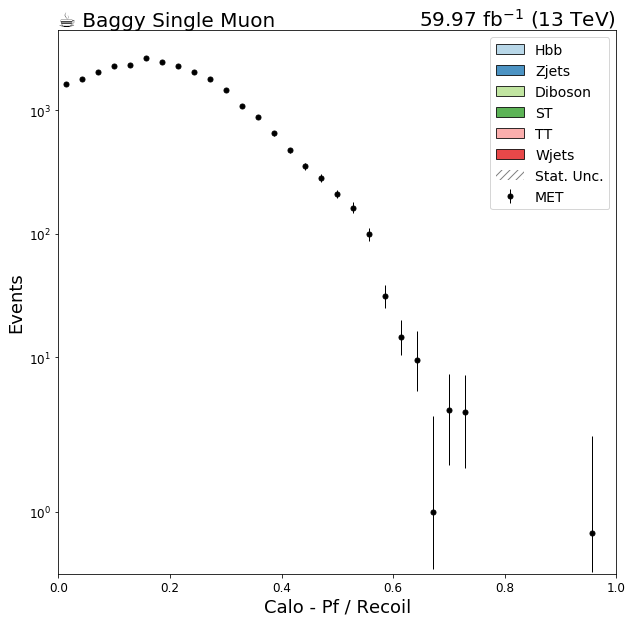

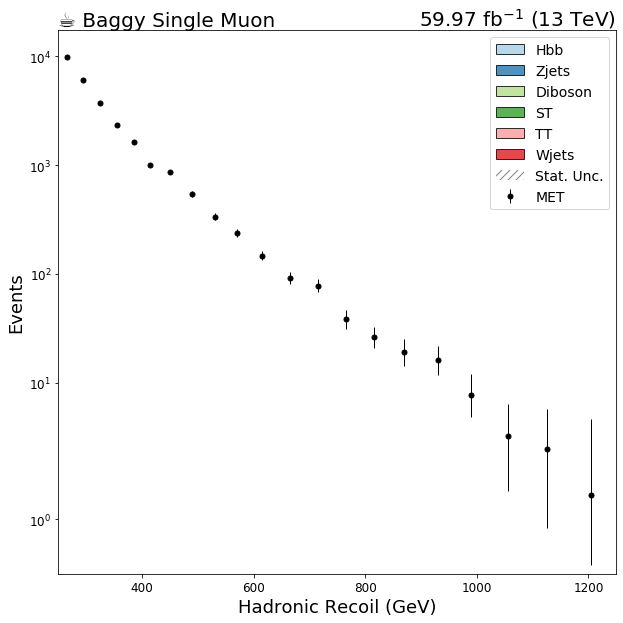

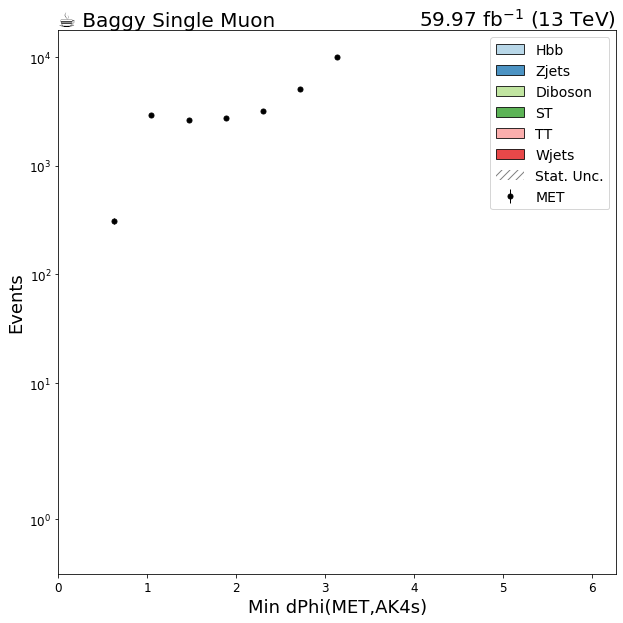

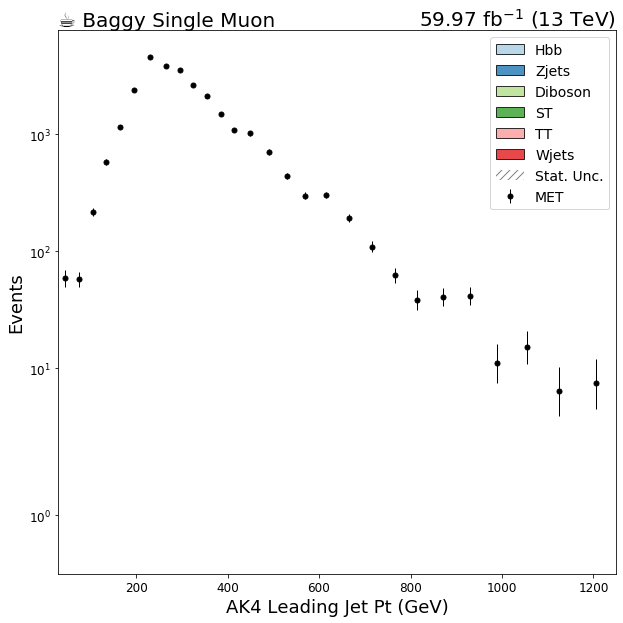

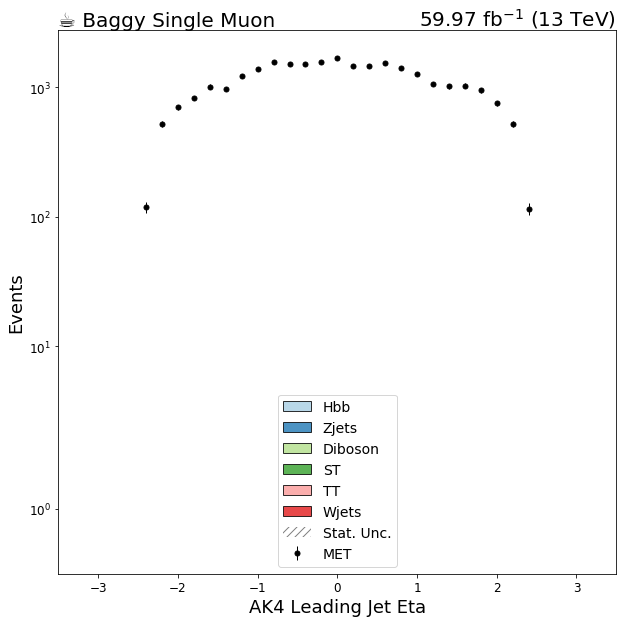

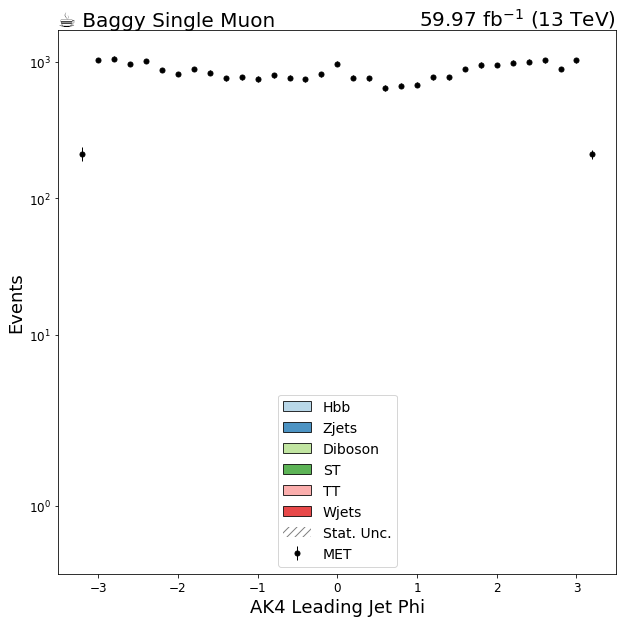

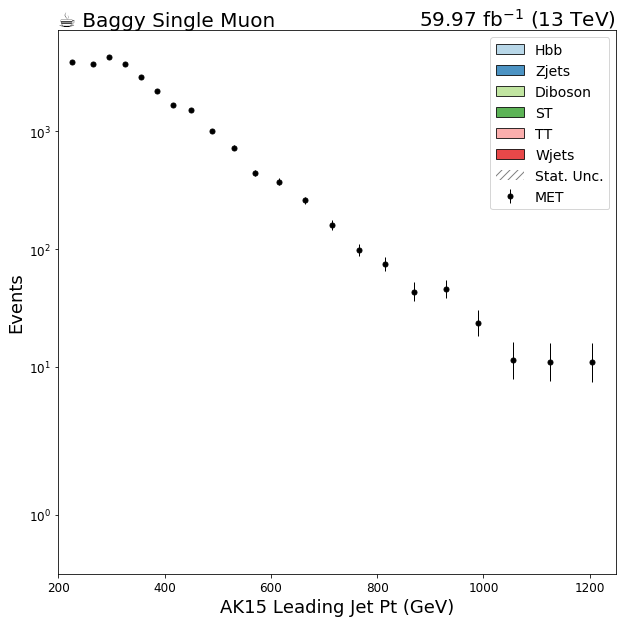

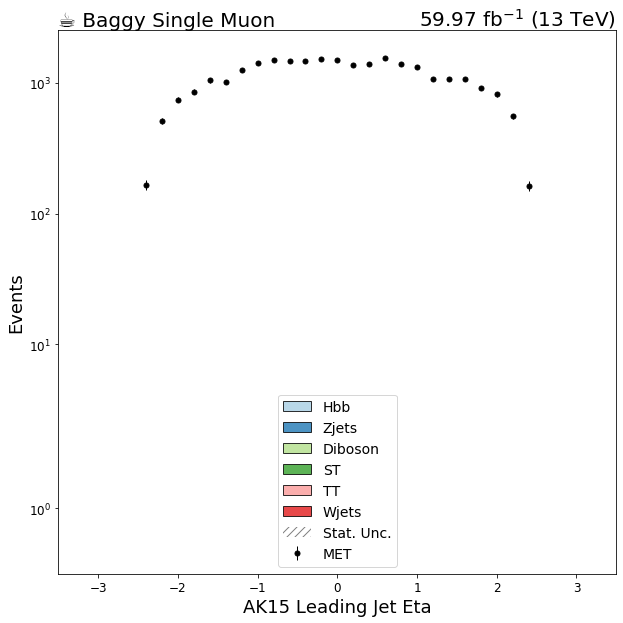

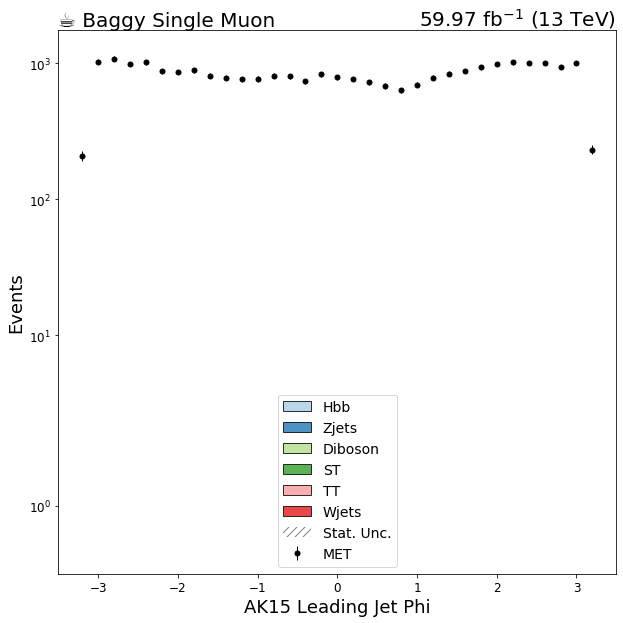

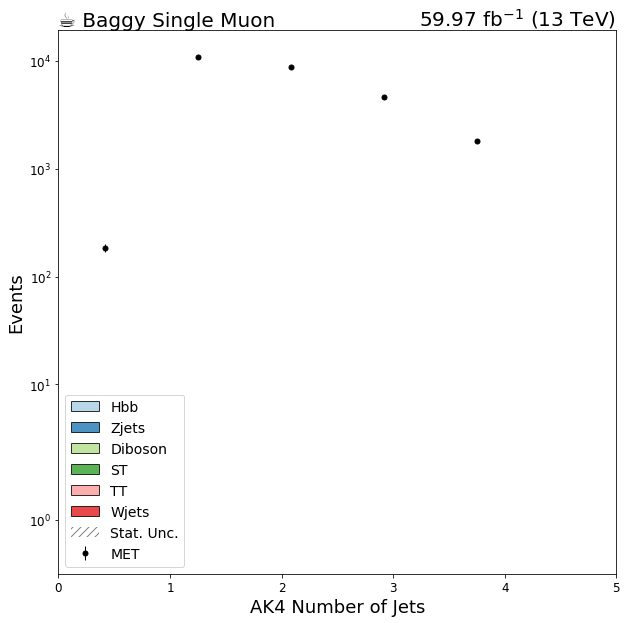

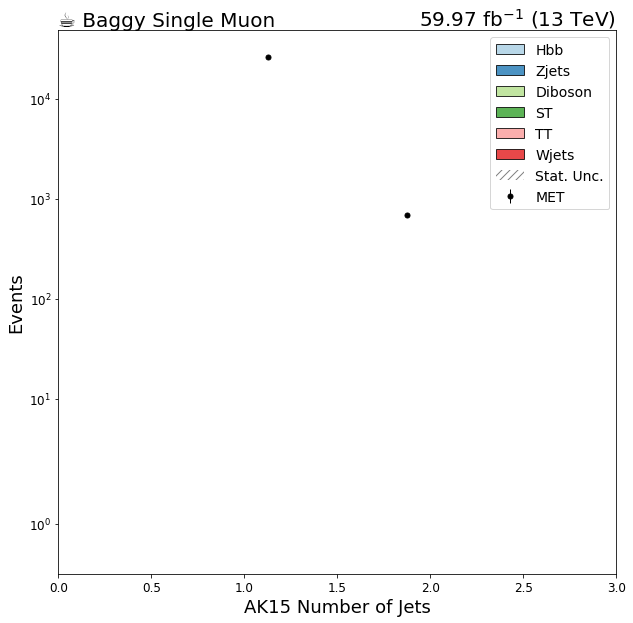

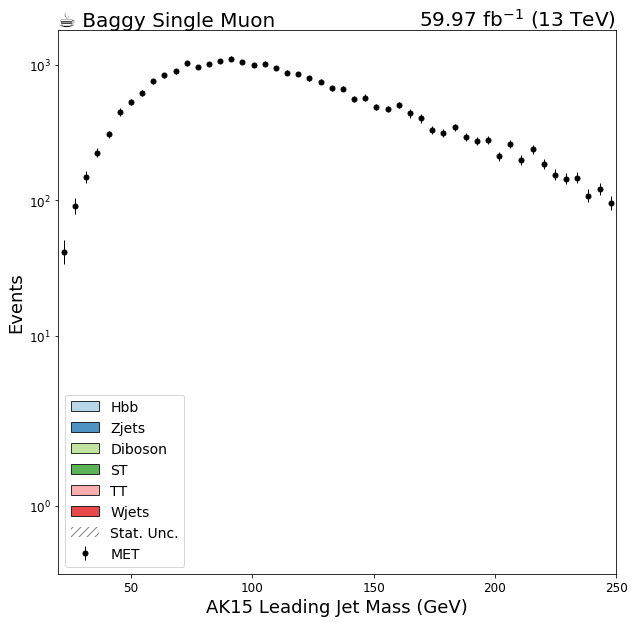

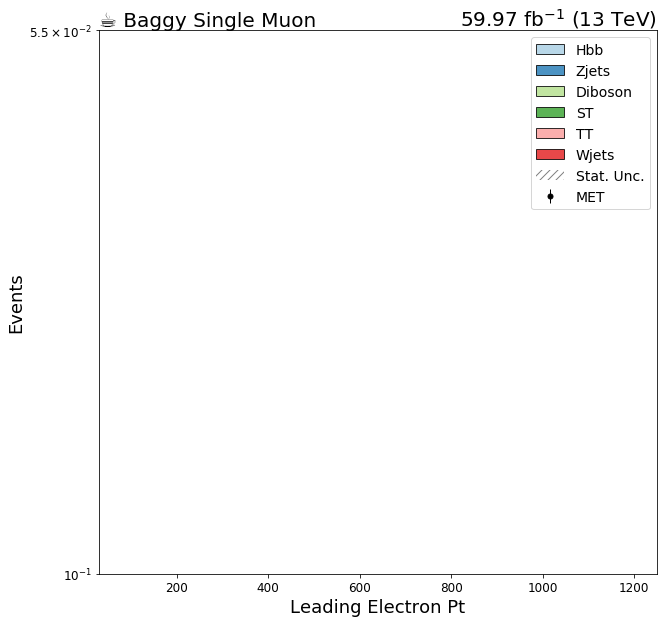

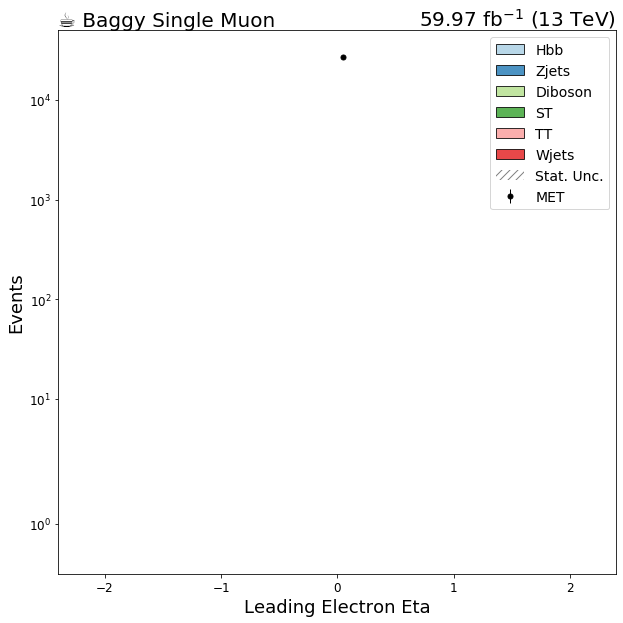

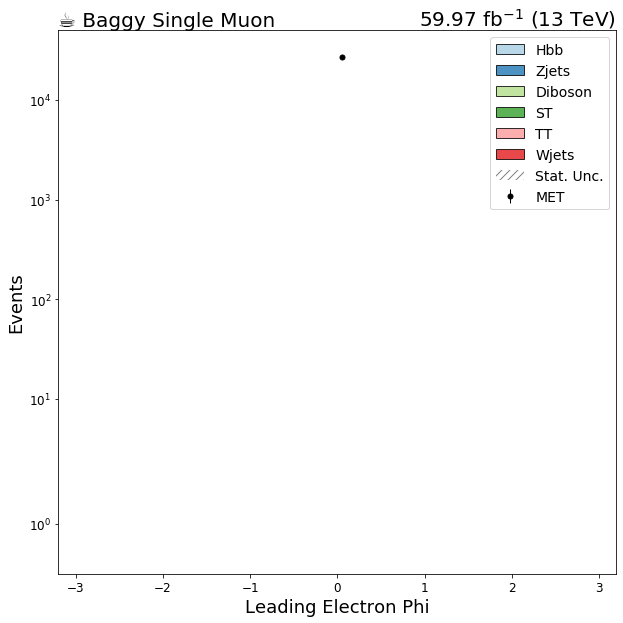

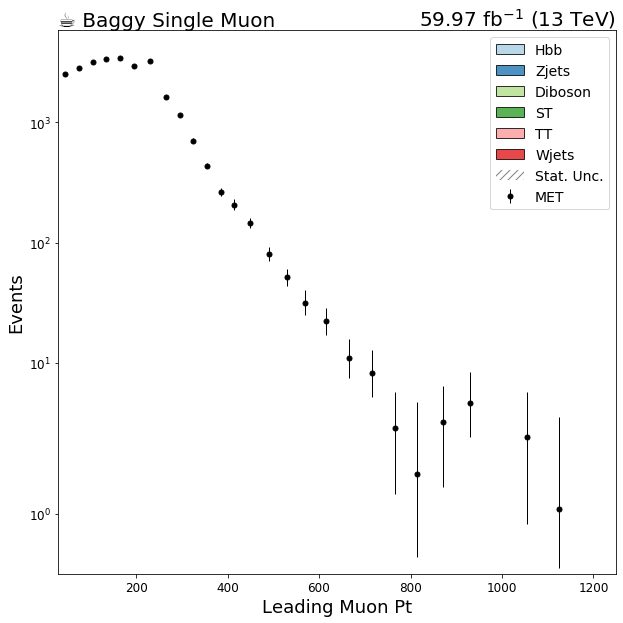

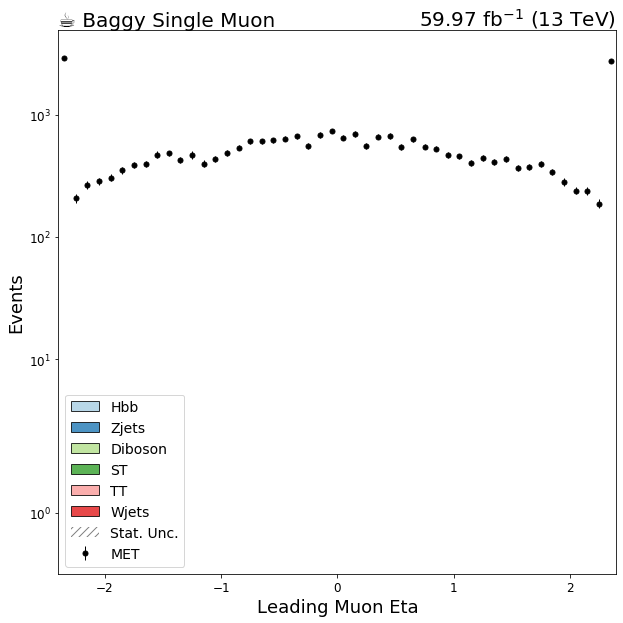

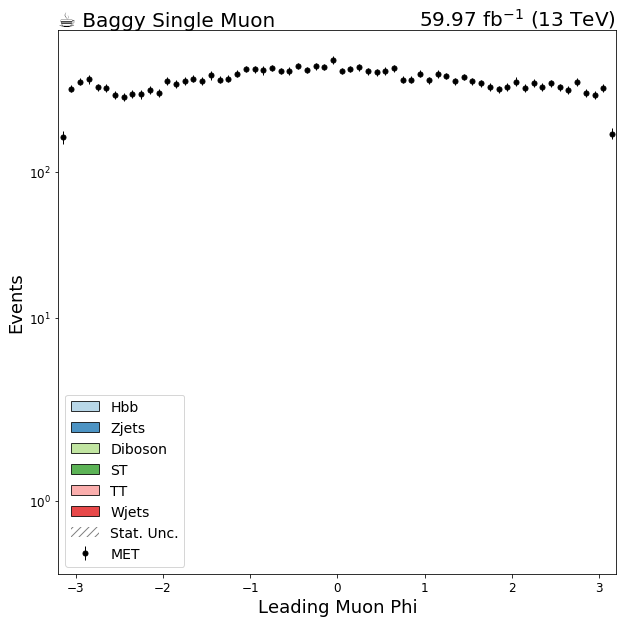

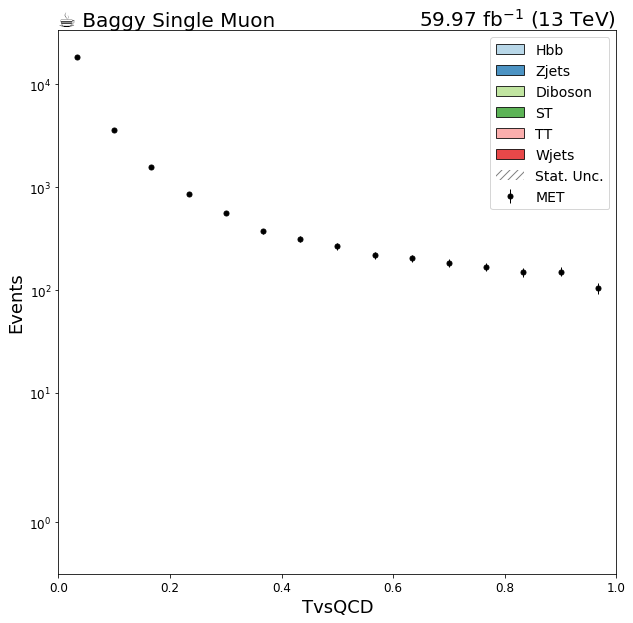

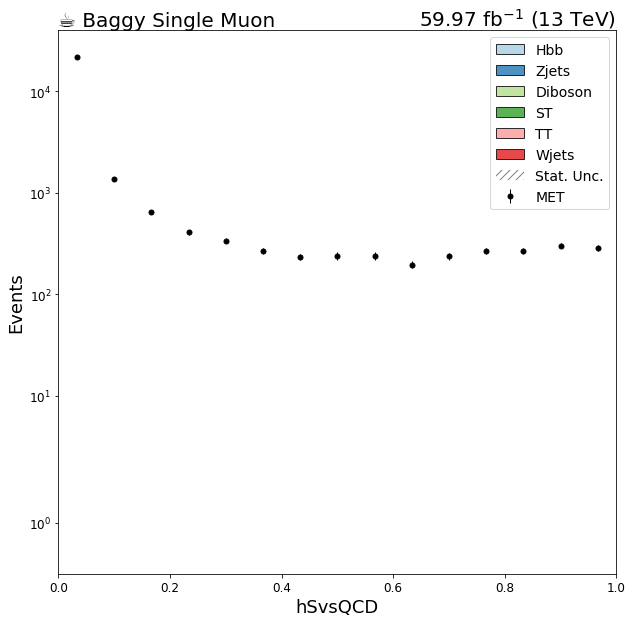

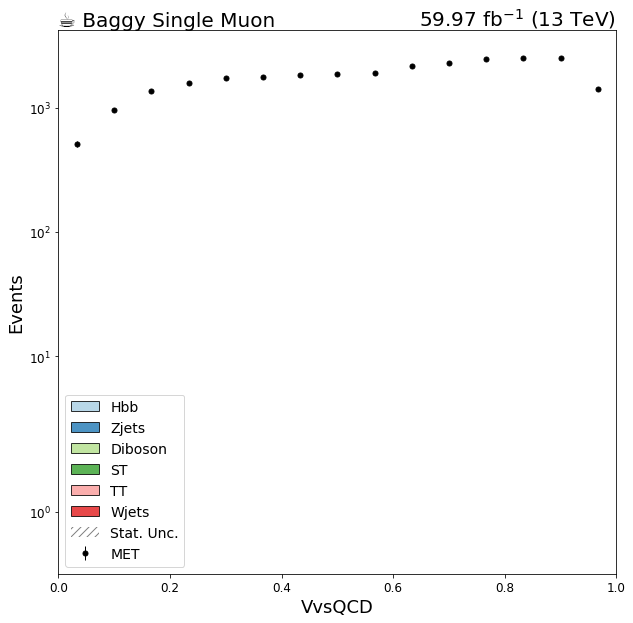

In [18]:
from cycler import cycler

plt.rcParams.update({'figure.max_open_warning': 0,'font.size': 14, 'axes.titlesize': 18, 'axes.labelsize': 18, 'xtick.labelsize': 12, 'ytick.labelsize': 12})
fill_opts = {'edgecolor': (0,0,0,0.3), 'alpha': 0.8}
error_opts = {'label':'Stat. Unc.', 'hatch':'///', 'facecolor':'none', 'edgecolor':(0,0,0,.5), 'linewidth': 0}
nostack_fill_opts = {'alpha': 0.2, 'label': '_nolabel_'}
data_err_opts = {'linestyle':'none', 'marker': '.', 'markersize': 10., 'color':'k', 'elinewidth': 1, 'emarker': '_'}
colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c']

if not os.path.exists('stack'):
    os.makedirs('stack')

for key in hists.keys():
    if key=='sumw': continue
    
    fig, ax = plt.subplots(1, 1, figsize=(10,10))
    ax.set_prop_cycle(cycler(color=colors))
    
    plot.plot1d(data_hists[key].project('jet_selection','baggy').project('region','isoneM'),
            overlay="process",
            ax=ax,
            clear=False,
            error_opts=data_err_opts
               )
    plot.plot1d(hists[key].project('jet_selection','baggy').project('region','isoneM'),
            overlay="process",
            ax=ax,
            clear=False,
            stack=True,
            line_opts=None,    
            fill_opts=fill_opts,
            error_opts=error_opts
               )
    ax.autoscale(axis='x', tight=True)
    ax.set_yscale('symlog')
    ax.set_ylim(.1, None)
    leg = ax.legend()
    coffee = plt.text(0., 1., u"☕ Baggy Single Muon", fontsize=20, horizontalalignment='left', verticalalignment='bottom', transform=ax.transAxes)
    lumi = plt.text(1., 1., r"59.97 fb$^{-1}$ (13 TeV)", fontsize=20, horizontalalignment='right', verticalalignment='bottom', transform=ax.transAxes)
    plot_path = os.path.abspath('stack') 
    plot_name = 'stack'+key+'.png'
    fig.savefig(os.path.join(plot_path, plot_name))

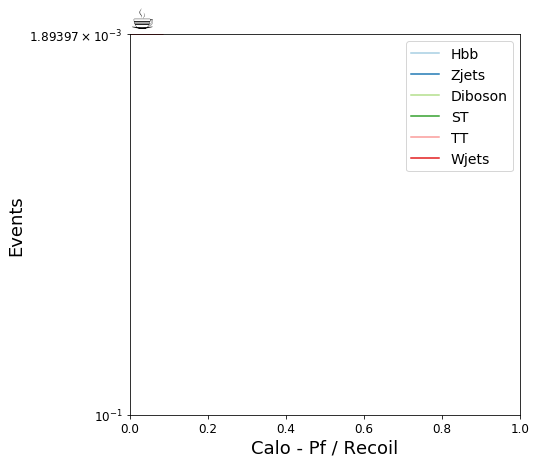

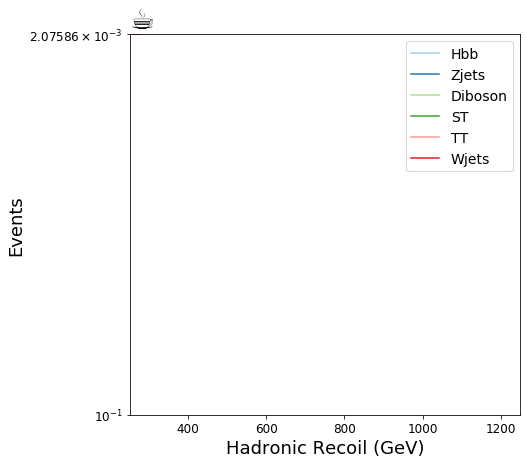

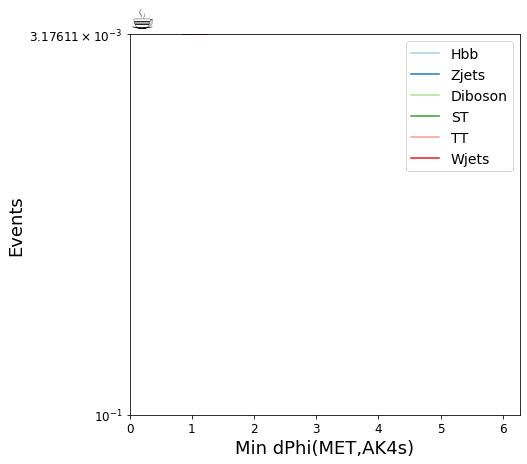

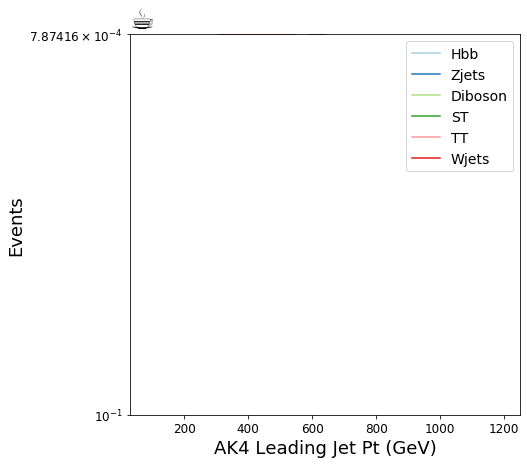

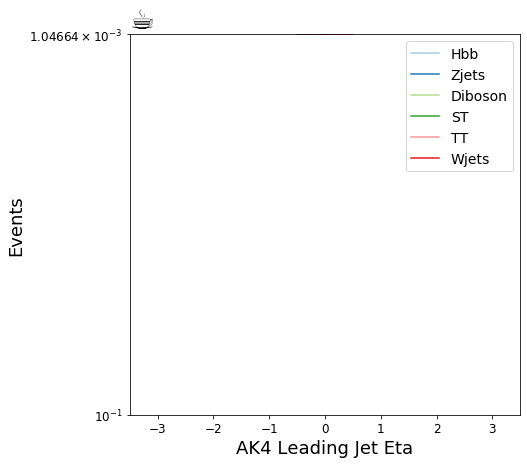

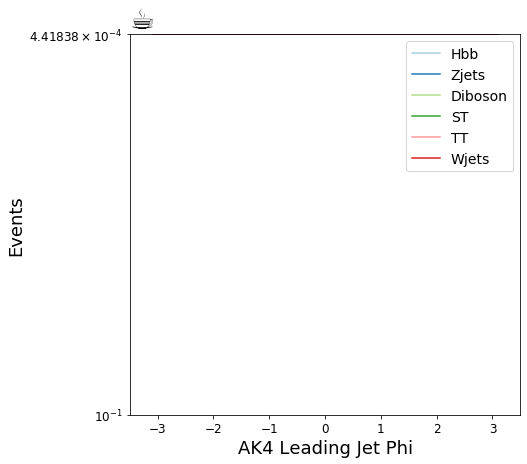

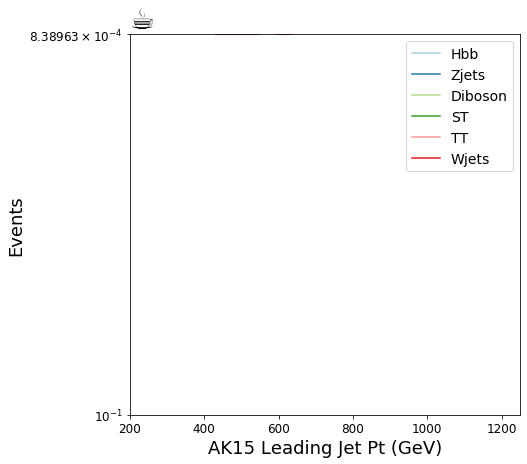

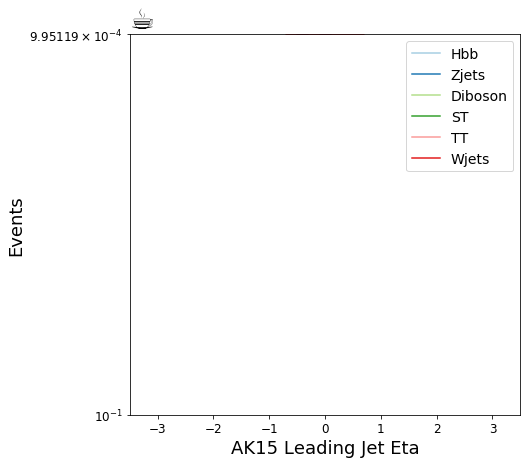

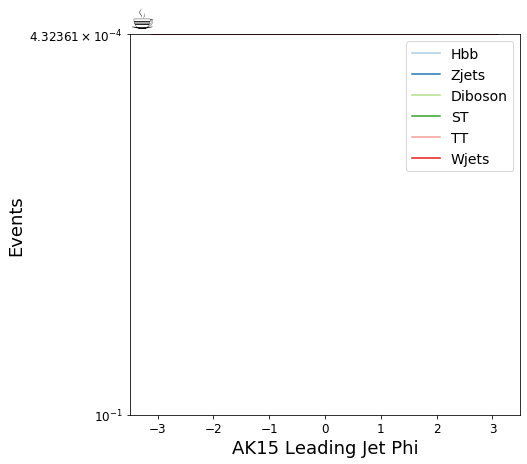

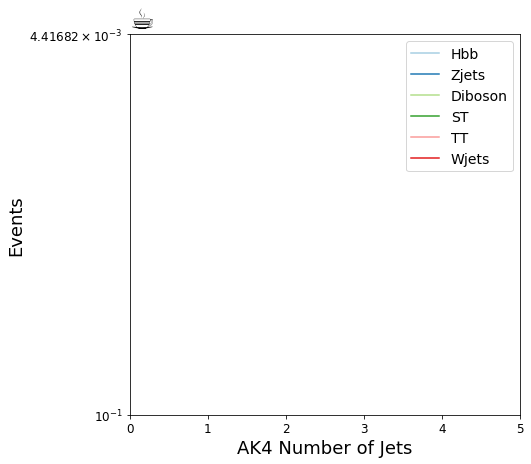

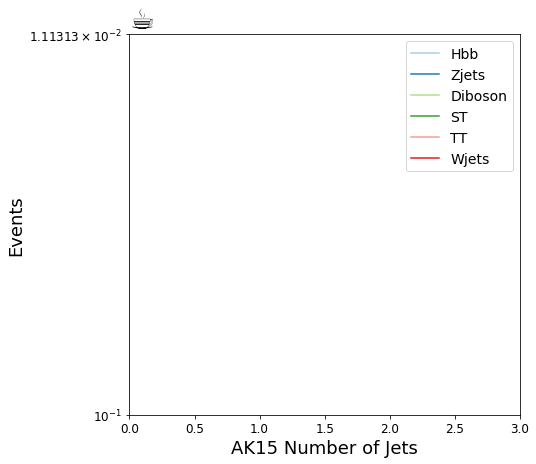

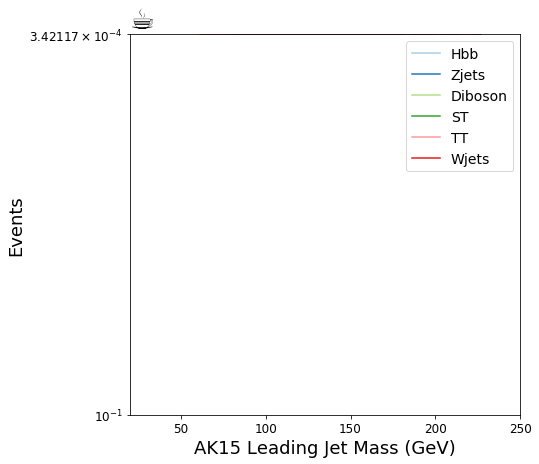

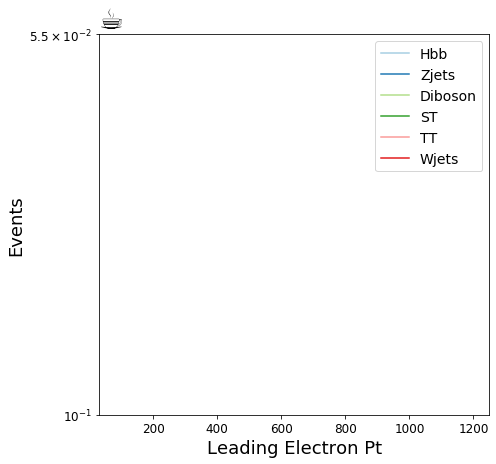

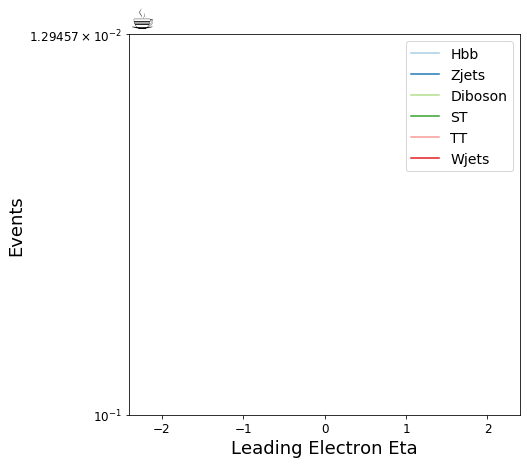

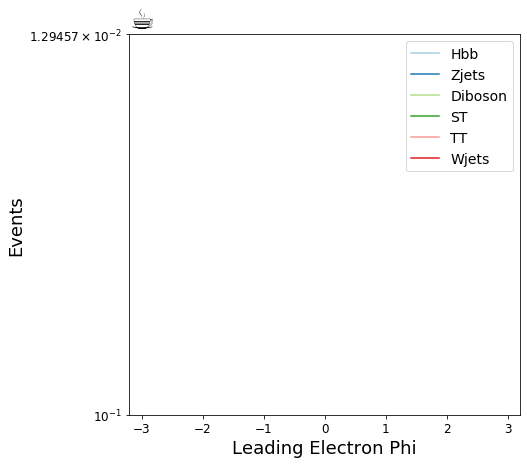

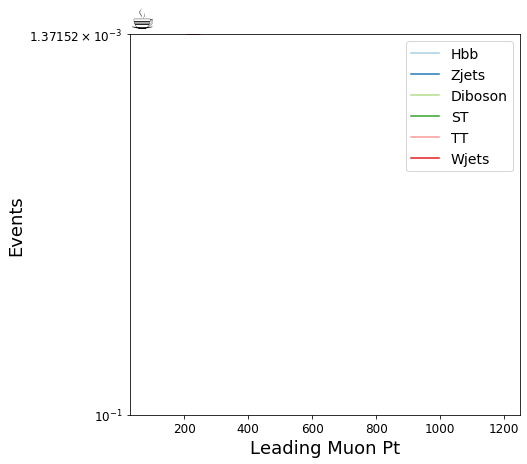

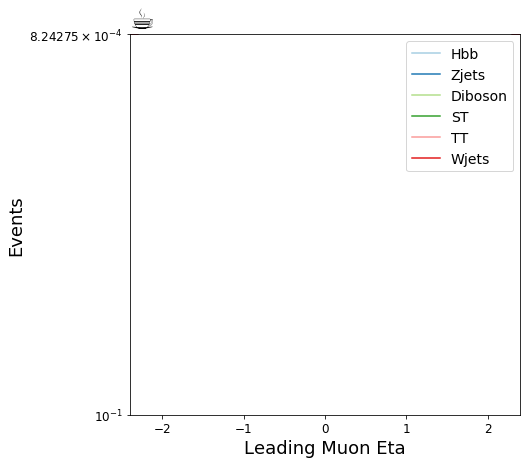

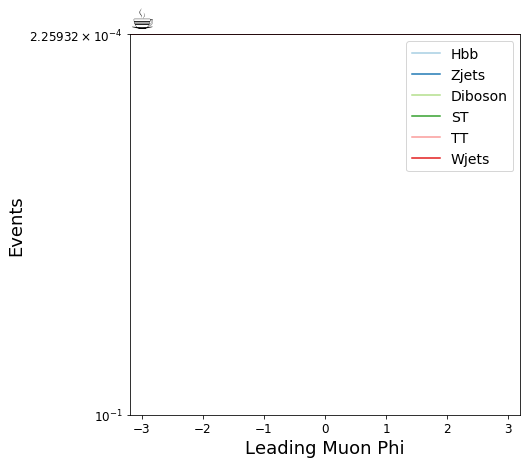

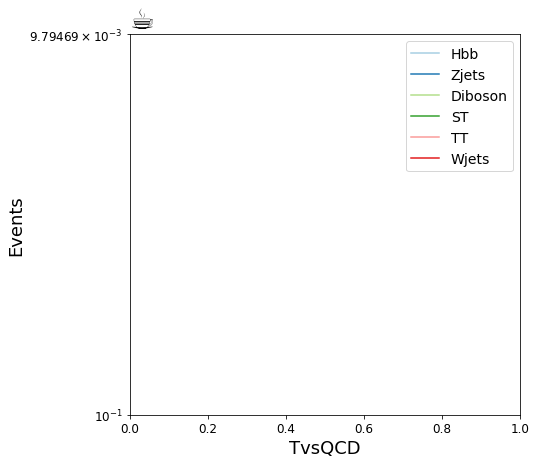

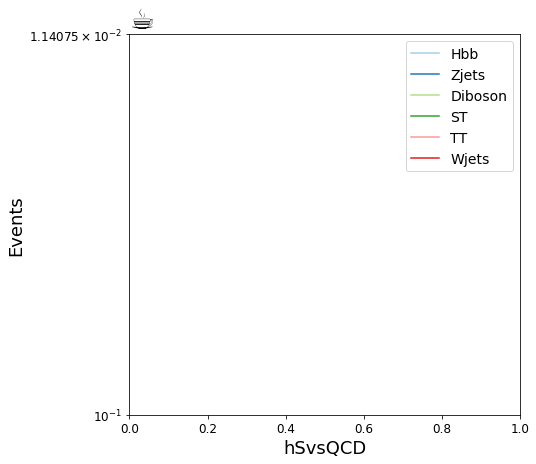

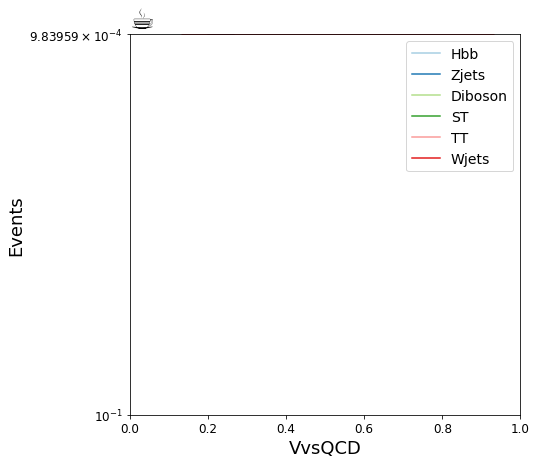

In [19]:
for key in hists.keys():
    if key=='sumw': continue

    fig, ax = plt.subplots(1, 1, figsize=(7,7))
    ax.set_prop_cycle(cycler(color=colors))
    plot.plot1d(hists[key].project('jet_selection','baggy').project('region','isoneM'), 
                overlay="process",
                ax=ax, 
                clear=False,
                stack=False,
                line_opts={},
               # density=1
               )
    ax.autoscale(axis='x', tight=True)
    ax.set_yscale('symlog')
    ax.set_ylim(.1, None)
    leg = ax.legend()
    coffee = plt.text(0., 1., u"☕", fontsize=28, horizontalalignment='left', verticalalignment='bottom', transform=ax.transAxes)
    #lumi = plt.text(1., 1., r"1 fb$^{-1}$ (13 TeV)", fontsize=16, horizontalalignment='right', verticalalignment='bottom', transform=ax.transAxes)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(7,7))
ax.set_prop_cycle(cycler(color=colors))
plot.plot1d(hists["recoil"].project('jet_selection').project('region'), ax=ax, overlay="process", clear=False, stack=False, line_opts={},density=1)
ax.autoscale(axis='x', tight=True)
ax.set_yscale('log')
leg = ax.legend()
coffee = plt.text(0., 1., u"☕", fontsize=28, horizontalalignment='left', verticalalignment='bottom', transform=ax.transAxes)
lumi = plt.text(1., 1., r"1 fb$^{-1}$ (13 TeV)", fontsize=16, horizontalalignment='right', verticalalignment='bottom', transform=ax.transAxes)